In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [2]:
def test(f_loss_file):    
    train_losses = []
    val_losses = []
    val_aurocs = []

    bag_test_aurocs = []

    f_loss = open(f_loss_file)
    count = -1
    params = ''
    for line_loss in f_loss:
        # print(line_loss)
        if count == -1:
            params = line_loss
        count += 1
        if count > 0:
            train_losses.append(float(line_loss.split(', ')[1]))
            val_losses.append(float(line_loss.split(', ')[2]))
            val_aurocs.append(float(line_loss.split(', ')[3]))
            bag_test_aurocs.append(float(line_loss.split(',')[4]))
    # print(len(val_aurocs) - np.argmax(val_aurocs))
    return bag_test_aurocs[np.argmax(val_aurocs)]

1 abdmil
0.9057306553
0.014201025949999946
1 ClamSB
0.78787592375
0.028501008362500024
1 ClamMB
0.7387957912
0.06630399342499999
1 dtfd
0.8072774083
0.022853464237499954
1 sglmodel
0.8331252679500001
0.01263652707500007
1 transformer
0.98107152355
0.049776133175000015
1 transmil
0.98107152355
0.049776133175000015
1 DAS_transformer
0.9300671948
0.13260683952500002

2 abdmil
0.8969871795
0.015627900974999998
2 ClamSB
0.80189769205
0.025821716549999985
2 ClamMB
0.7590446108
0.032125600899999995
2 dtfd
0.8010164693499999
0.042433142487499964
2 sglmodel
0.82562959235
0.030659946312499964
2 transformer
0.7472797958
0.02778245365000004
2 transmil
0.7472797958
0.02778245365000004
2 DAS_transformer
0.6416982655000001
0.126315645925

3 abdmil
0.9161114540499999
0.013292452375000041
3 ClamSB
0.8348995887499999
0.026594542949999966
3 ClamMB
0.7374316016
0.05438381062499997
3 dtfd
0.8034554399
0.04107876601249999
3 sglmodel
0.82043900185
0.009841447362499978
3 transformer
0.65415909195
0.0579108907

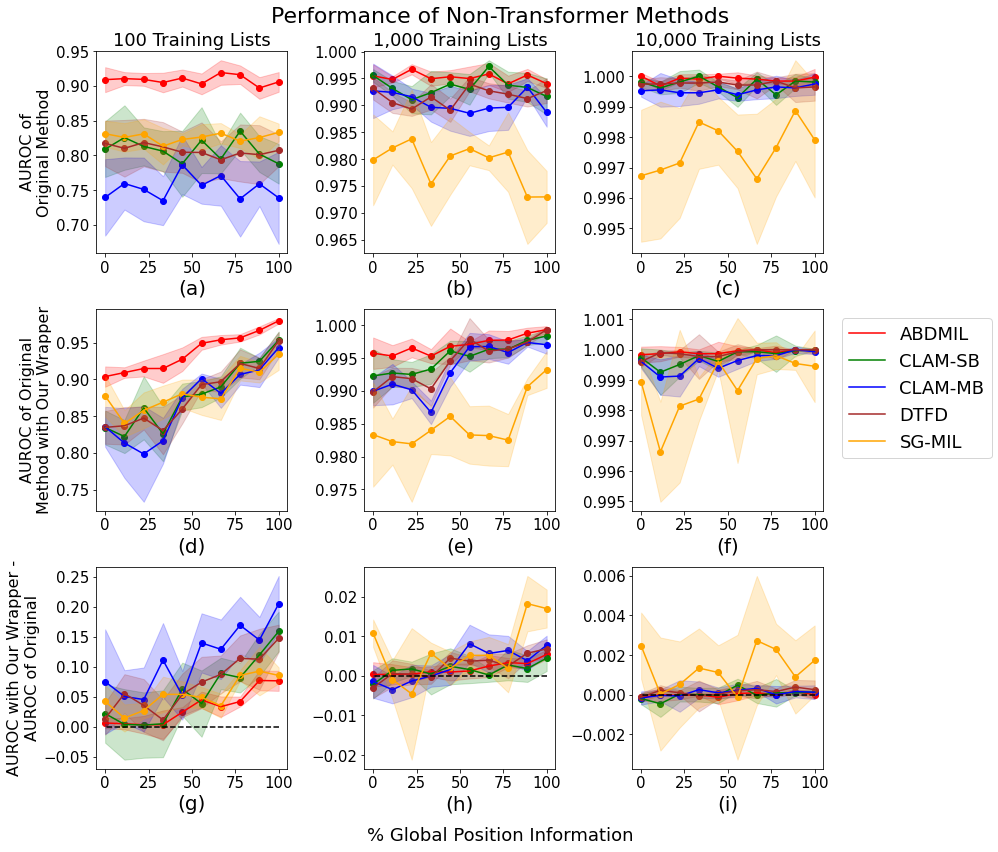

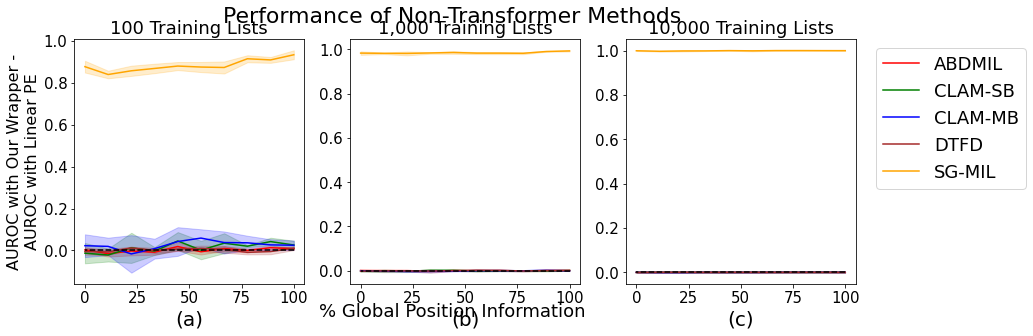

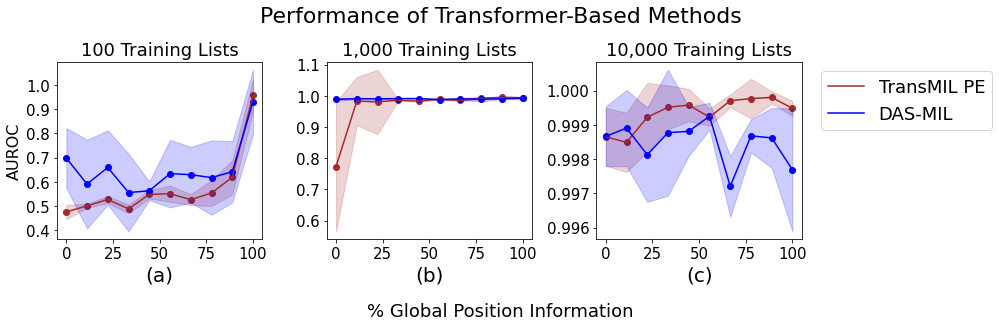

In [3]:
bagrocs = {}
bagrocs_pe = {}
bagrocs_linearpe = {}

bagrocs_iqr = {}
bagrocs_pe_iqr = {}
bagrocs_linearpe_iqr = {}

bagrocs_diff = {}
bagrocs_diff_iqr = {}

bagrocs_diff_pecomp = {}
bagrocs_diff_pecomp_iqr = {}

bagrocs_diff_lintoreg = {}
bagrocs_diff_lintoreg_iqr = {}


gpi = [100.0, 88.8888888888889, 77.77777777777779, 66.66666666666666, 55.55555555555556, 44.44444444444445, 33.333333333333336, 22.222222222222225, 11.111111111111112, 0.0]
all_models = ['abdmil', 'ClamSB', 'ClamMB', 'dtfd', 'sglmodel', 'transformer', 'transmil', 'DAS_transformer']

proper_labels = ['ABDMIL', 'CLAM-SB', 'CLAM-MB', 'DTFD', 'SG-MIL']
plotted_models = ['abdmil', 'ClamSB', 'ClamMB', 'dtfd', 'sglmodel']
colors = ['red', 'green', 'blue', 'brown', 'orange']

fig, axs = plt.subplots(nrows = 3, ncols=3)
fig.set_figheight(12)
fig.set_figwidth(14)

fig2, axs2 = plt.subplots(ncols=3)
fig2.set_figheight(4.5)
fig2.set_figwidth(14)

fig3, axs3 = plt.subplots(ncols=3)
fig3.set_figheight(4.5)
fig3.set_figwidth(14)

COUNT = -1
for num_bags in [100, 1000, 10000]:
    COUNT += 1
    # print(num_bags)
    for model in all_models:
        bagrocs[model] = []
        bagrocs_pe[model] = []
        bagrocs_linearpe[model] = []
        
        bagrocs_iqr[model] = []
        bagrocs_pe_iqr[model] = []
        bagrocs_linearpe_iqr[model] = []
        
        bagrocs_diff[model] = []
        bagrocs_diff_iqr[model] = []
        
        bagrocs_diff_pecomp[model] = []
        bagrocs_diff_pecomp_iqr[model] = []
        
        bagrocs_diff_lintoreg[model] = []
        bagrocs_diff_lintoreg_iqr[model] = []
        
        
    for perm_dist in range(1, 11):
        for model in all_models:
            currbr = []
            currbrpe = []
            currbrlinearpe = []
            for seed in range(10):
                if model == 'transmil':
                    nope = 'transformer'
                    linearpe = 'transformer_linearpe'
                    pe = 'transmil'
                else:
                    nope = model
                    pe = model + '_pe'
                    linearpe = model + '_linearpe'
                        
                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, nope)
                    currbr.append(test(f_loss_file))
                except:
                    error = 1
                    currbr.append(0)
                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, pe)
                    currbrpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrpe.append(0)
                    
                try:
                    f_loss_file = '/data2/user/txtfiles/seed%d_numbags%d_MNIST_permdist%d_%s_loss.txt'%(seed, num_bags, perm_dist, linearpe)
                    currbrlinearpe.append(test(f_loss_file))
                except:
                    error = 1
                    currbrlinearpe.append(0)
                    
            print(perm_dist, model)
            print(np.median(currbr))
            print(stats.iqr(currbr)/2)
            bagrocs[model].append(np.median(currbr))
            bagrocs_pe[model].append(np.median(currbrpe))
            bagrocs_linearpe[model].append(np.median(currbrlinearpe))
            
            bagrocs_iqr[model].append(stats.iqr(currbr)/2)
            bagrocs_pe_iqr[model].append(stats.iqr(currbrpe)/2)
            bagrocs_linearpe_iqr[model].append(stats.iqr(currbrlinearpe)/2)
            
            bagrocs_diff[model].append(np.median(np.array(currbrpe) - np.array(currbr)))
            bagrocs_diff_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbr))/2)
            
            bagrocs_diff_pecomp[model].append(np.median(np.array(currbrpe) - np.array(currbrlinearpe)))
            bagrocs_diff_pecomp_iqr[model].append(stats.iqr(np.array(currbrpe) - np.array(currbrlinearpe))/2)
            
            bagrocs_diff_lintoreg[model].append(np.median(np.array(currbrlinearpe) - np.array(currbr)))
            bagrocs_diff_lintoreg_iqr[model].append(stats.iqr(np.array(currbrlinearpe) - np.array(currbr))/2)
            
        print()
    print()
    
    for i, model in enumerate(plotted_models):
        axs[0][COUNT].scatter(gpi, np.array(bagrocs[model]), color = colors[i])
        axs[0][COUNT].plot(gpi, np.array(bagrocs[model]), label = proper_labels[i], color = colors[i])
        axs[0][COUNT].fill_between(gpi, np.array(bagrocs[model]) - np.array(bagrocs_iqr[model]), np.array(bagrocs[model]) + np.array(bagrocs_iqr[model]), alpha=0.2, color = colors[i])

    for i, model in enumerate(plotted_models):
        axs[1][COUNT].scatter(gpi, np.array(bagrocs_pe[model]), color = colors[i])
        axs[1][COUNT].plot(gpi, np.array(bagrocs_pe[model]), label = proper_labels[i], color = colors[i])
        axs[1][COUNT].fill_between(gpi, np.array(bagrocs_pe[model]) - np.array(bagrocs_pe_iqr[model]), np.array(bagrocs_pe[model]) + np.array(bagrocs_pe_iqr[model]), alpha=0.2, color = colors[i])

    for i, model in enumerate(plotted_models):
        axs[2][COUNT].scatter(gpi, bagrocs_diff[model], color = colors[i])
        axs[2][COUNT].plot(gpi, bagrocs_diff[model], label = proper_labels[i], color = colors[i])
        axs[2][COUNT].fill_between(gpi, np.array(bagrocs_diff[model]) - np.array(bagrocs_diff_iqr[model]), np.array(bagrocs_diff[model]) + np.array(bagrocs_diff_iqr[model]), alpha=0.2, color = colors[i])
    
    for i, model in enumerate(plotted_models):
        axs2[COUNT].plot(gpi, bagrocs_diff_pecomp[model], label = proper_labels[i], color = colors[i])
        axs2[COUNT].fill_between(gpi, np.array(bagrocs_diff_pecomp[model]) - np.array(bagrocs_diff_pecomp_iqr[model]), np.array(bagrocs_diff_pecomp[model]) + np.array(bagrocs_diff_pecomp_iqr[model]), alpha=0.2, color = colors[i])
    
#     axs3[0][COUNT].plot(gpi, bagrocs_linearpe['transformer'], label = 'Linear PE', color = colors[1])
#     axs3[0][COUNT].fill_between(gpi, np.array(bagrocs_linearpe['transformer']) - np.array(bagrocs_linearpe_iqr['transformer']), np.array(bagrocs_linearpe['transformer']) + np.array(bagrocs_linearpe_iqr['transformer']), alpha=0.2, color = colors[1])
    
    axs3[COUNT].scatter(gpi, bagrocs_pe['transmil'], color = colors[3])
    axs3[COUNT].plot(gpi, bagrocs_pe['transmil'], label = 'TransMIL', color = colors[3])
    axs3[COUNT].fill_between(gpi, np.array(bagrocs_pe['transmil']) - np.array(bagrocs_pe_iqr['transmil']), np.array(bagrocs_pe['transmil']) + np.array(bagrocs_pe_iqr['transmil']), alpha=0.2, color = colors[3])
    
    axs3[COUNT].scatter(gpi, bagrocs['DAS_transformer'], color = colors[2])
    axs3[COUNT].plot(gpi, bagrocs['DAS_transformer'], label = 'DAS-MIL', color = colors[2])
    axs3[COUNT].fill_between(gpi, np.array(bagrocs['DAS_transformer']) - np.array(bagrocs_iqr['DAS_transformer']), np.array(bagrocs['DAS_transformer']) + np.array(bagrocs_iqr['DAS_transformer']), alpha=0.2, color = colors[2])
    
    
    
#     axs3[1][COUNT].plot(gpi, bagrocs_diff_lintoreg['transformer'], label = 'Linear PE', color = colors[1])
#     axs3[1][COUNT].fill_between(gpi, np.array(bagrocs_diff_lintoreg['transformer']) - np.array(bagrocs_diff_lintoreg_iqr['transformer']), np.array(bagrocs_diff_lintoreg['transformer']) + np.array(bagrocs_diff_lintoreg_iqr['transformer']), alpha=0.2, color = colors[1])
    
#     axs3[1][COUNT].plot(gpi, bagrocs_diff['transformer'], label = 'Our Wrapper', color = colors[2])
#     axs3[1][COUNT].fill_between(gpi, np.array(bagrocs_diff['transformer']) - np.array(bagrocs_diff_iqr['transformer']), np.array(bagrocs_diff['transformer']) + np.array(bagrocs_diff_iqr['transformer']), alpha=0.2, color = colors[2])
    
#     axs3[1][COUNT].plot(gpi, bagrocs_diff['transmil'], label = 'TransMIL', color = colors[3])
#     axs3[1][COUNT].fill_between(gpi, np.array(bagrocs_diff['transmil']) - np.array(bagrocs_diff_iqr['transmil']), np.array(bagrocs_diff['transmil']) + np.array(bagrocs_diff_iqr['transmil']), alpha=0.2, color = colors[3])

    
    axs[2][COUNT].plot(gpi, [0]*10, linestyle = '--', color = 'black')
    axs2[COUNT].plot(gpi, [0]*10, linestyle = '--', color = 'black')
    # axs3[1][COUNT].plot(gpi, [0]*10, linestyle = '--', color = 'black')

labs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
count = -1
for i in range(3):
    for j in range(3):
        count += 1
        axs[i][j].set_xlabel('(%s)'%labs[count], fontsize=20)
        for tick in axs[i][j].xaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        for tick in axs[i][j].yaxis.get_major_ticks():
            tick.label.set_fontsize(15)
        ymin, ymax = axs[i][j].get_ylim()
        xmin, xmax = axs[i][j].get_xlim()
        # axs[i][j].set_yticks(np.round(np.linspace(ymin, ymax, 4), 2))
        axs[i][j].set_xticks([0, 25, 50, 75, 100], labels = [0, 25, 50, 75, 100])

axs[0][0].set_title('100 Training Lists', fontsize=18)
axs[0][1].set_title('1,000 Training Lists', fontsize=18)
axs[0][2].set_title('10,000 Training Lists', fontsize=18)

axs[0][0].set_ylabel('AUROC of\nOriginal Method', fontsize=16)
axs[1][0].set_ylabel('AUROC of Original\nMethod with Our Wrapper', fontsize=16)
axs[2][0].set_ylabel('AUROC with Our Wrapper -\nAUROC of Original', fontsize=16)

axs[1][2].legend()
axs[1][2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
fig.supxlabel('% Global Position Information', fontsize=18)


labs = ['a', 'b', 'c']
count = -1
for i in range(3):
    count += 1
    axs2[i].set_xlabel('(%s)'%labs[count], fontsize=20)
    for tick in axs2[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in axs2[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ymin, ymax = axs2[i].get_ylim()
    xmin, xmax = axs2[i].get_xlim()
    # axs2[i].set_yticks(np.round(np.linspace(ymin, ymax, 4), 2))
    axs2[i].set_xticks([0, 25, 50, 75, 100], labels = [0, 25, 50, 75, 100])

axs2[0].set_title('100 Training Lists', fontsize=18)
axs2[1].set_title('1,000 Training Lists', fontsize=18)
axs2[2].set_title('10,000 Training Lists', fontsize=18)
axs2[0].set_ylabel('AUROC with Our Wrapper -\nAUROC with Linear PE', fontsize=16)

axs2[2].legend()
axs2[2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
fig2.supxlabel('% Global Position Information', fontsize=18)

labs = ['a', 'b', 'c']
count = -1
for j in range(3):
    count += 1
    axs3[j].set_xlabel('(%s)'%labs[count], fontsize=20)
    for tick in axs3[j].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in axs3[j].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ymin, ymax = axs3[j].get_ylim()
    xmin, xmax = axs3[j].get_xlim()
    # axs3[i][j].set_yticks(np.round(np.linspace(ymin, ymax, 4), 2))
    # axs3[i][j].set_xticks(list(range(0, 125, 25)))
    axs3[j].set_xticks([0, 25, 50, 75, 100], labels = [0, 25, 50, 75, 100])

axs3[0].set_title('100 Training Lists', fontsize=18)
axs3[1].set_title('1,000 Training Lists', fontsize=18)
axs3[2].set_title('10,000 Training Lists', fontsize=18)

axs3[0].set_ylabel('AUROC', fontsize=16)

axs3[2].legend()
axs3[2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=18)
fig3.supxlabel('% Global Position Information', fontsize=18)


fig.suptitle('Performance of Non-Transformer Methods', fontsize=22)
fig.tight_layout()
fig.savefig('synth_plots.png')

fig2.suptitle('Performance of Non-Transformer Methods', fontsize=22)
# fig2.tight_layout()
# fig2.savefig('comp_pe.png')

fig3.suptitle('Performance of Transformer-Based Methods', fontsize=22)
fig3.tight_layout()
fig3.savefig('comp_transformer.png')




